# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saskylakh
Processing Record 2 of Set 1 | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sambava
Processing Record 3 of Set 1 | wolgast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=wolgast
Processing Record 4 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=new%20norfolk
Processing Record 5 of Set 1 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=touros
Processing Record 6 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tuktoyaktuk
Processing Record 7 

Processing Record 3 of Set 2 | sovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sovetskiy
Processing Record 4 of Set 2 | sucua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sucua
Processing Record 5 of Set 2 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=belushya%20guba
City not found. Skipping...
Processing Record 6 of Set 2 | solsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=solsvik
City not found. Skipping...
Processing Record 7 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hermanus
Processing Record 8 of Set 2 | santa luzia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=santa%20luzia
Processing Record 

Processing Record 5 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaini
Processing Record 6 of Set 3 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nishihara
Processing Record 7 of Set 3 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=taltal
Processing Record 8 of Set 3 | dzhebariki-khaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dzhebariki-khaya
Processing Record 9 of Set 3 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=castro
Processing Record 10 of Set 3 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bolungarvik
City not found. Skipping...
Processing Record 11 of Set 3 | antofagasta
http:

Processing Record 8 of Set 4 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=anadyr
Processing Record 9 of Set 4 | katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=katobu
Processing Record 10 of Set 4 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=umzimvubu
City not found. Skipping...
Processing Record 11 of Set 4 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=avarua
Processing Record 12 of Set 4 | cognac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cognac
Processing Record 13 of Set 4 | dondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dondo
Processing Record 14 of Set 4 | port blair
http://api.openweathermap.org/dat

Processing Record 10 of Set 5 | taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=taksimo
Processing Record 11 of Set 5 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=leningradskiy
Processing Record 12 of Set 5 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=faanui
Processing Record 13 of Set 5 | yanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yanai
Processing Record 14 of Set 5 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=shingu
Processing Record 15 of Set 5 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=quelimane
Processing Record 16 of Set 5 | thinadhoo
http://api.openweathermap.org/data/2.5/weath

Processing Record 12 of Set 6 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=opuwo
Processing Record 13 of Set 6 | verkhneuralsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=verkhneuralsk
Processing Record 14 of Set 6 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=arlit
Processing Record 15 of Set 6 | balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=balabac
Processing Record 16 of Set 6 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=coquimbo
Processing Record 17 of Set 6 | reforma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=reforma
Processing Record 18 of Set 6 | beyneu
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 15 of Set 7 | niamey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=niamey
Processing Record 16 of Set 7 | hailar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hailar
Processing Record 17 of Set 7 | virden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=virden
Processing Record 18 of Set 7 | cortez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cortez
Processing Record 19 of Set 7 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pacific%20grove
Processing Record 20 of Set 7 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=amderma
City not found. Skipping...
Processing Record 21 of Set 7 | kayerkan
http://api.openweat

Processing Record 19 of Set 8 | pelym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pelym
Processing Record 20 of Set 8 | saint-gaudens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint-gaudens
Processing Record 21 of Set 8 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=banda%20aceh
Processing Record 22 of Set 8 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint%20george
Processing Record 23 of Set 8 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=padang
Processing Record 24 of Set 8 | emporia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=emporia
Processing Record 25 of Set 8 | agadir
http://api.openweathermap.org

Processing Record 22 of Set 9 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=asau
City not found. Skipping...
Processing Record 23 of Set 9 | vytegra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vytegra
Processing Record 24 of Set 9 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cherskiy
Processing Record 25 of Set 9 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vanimo
Processing Record 26 of Set 9 | jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jizan
Processing Record 27 of Set 9 | anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=anchorage
Processing Record 28 of Set 9 | ambulu
http://api.openweathermap.org/dat

Processing Record 25 of Set 10 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=gat
Processing Record 26 of Set 10 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tiznit
Processing Record 27 of Set 10 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=paamiut
Processing Record 28 of Set 10 | port shepstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port%20shepstone
Processing Record 29 of Set 10 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kudahuvadhoo
Processing Record 30 of Set 10 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=korla
City not found. Skipping...
Processing Record 31 of Set 10 | batemans bay
ht

Processing Record 28 of Set 11 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sao%20felix%20do%20xingu
Processing Record 29 of Set 11 | otavi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=otavi
Processing Record 30 of Set 11 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hovd
Processing Record 31 of Set 11 | kisanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kisanga
Processing Record 32 of Set 11 | puerto narino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=puerto%20narino
Processing Record 33 of Set 11 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=husavik
Processing Record 34 of Set 11 | puro
http://api.openwea

Processing Record 31 of Set 12 | baoning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=baoning
Processing Record 32 of Set 12 | pochutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pochutla
Processing Record 33 of Set 12 | skalistyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=skalistyy
City not found. Skipping...
Processing Record 34 of Set 12 | sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sabha
Processing Record 35 of Set 12 | leh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=leh
Processing Record 36 of Set 12 | tuyen quang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tuyen%20quang
Processing Record 37 of Set 12 | dubti
http://api.openwe

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saskylakh,12,RU,1517957575,0,71.97,114.09,-44.91,8.77
1,sambava,76,MG,1517957575,100,-14.27,50.17,77.27,5.41
2,wolgast,20,DE,1517957575,100,54.05,13.77,24.62,4.18
3,new norfolk,0,AU,1517954400,52,-42.78,147.06,69.80,8.05
4,touros,68,BR,1517957576,87,-5.20,-35.46,79.74,9.55


## Latitude vs Temperature Plot

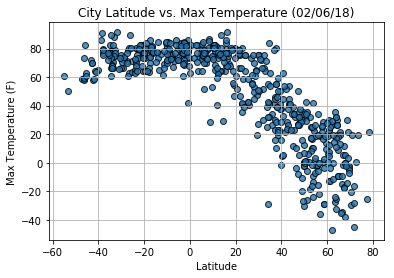

In [9]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

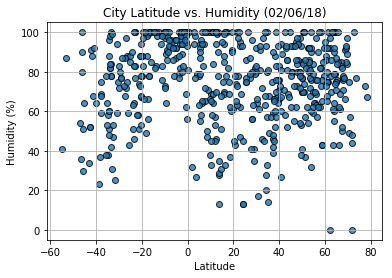

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

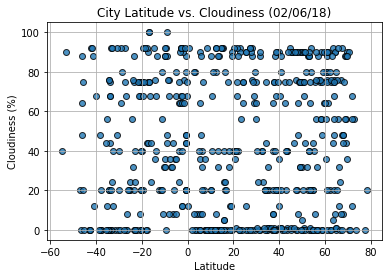

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

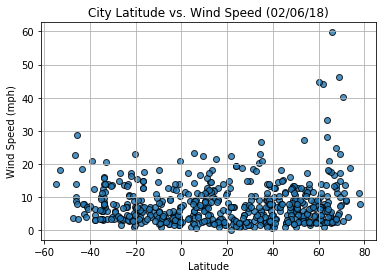

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [3]:
city_data_table = pd.read_csv('output_data/cities.csv')
city_data_table_df = pd.DataFrame(city_data_table)
city_data_table_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,saskylakh,12,RU,1517957575,0,71.97,114.09,-44.91,8.77
1,1,sambava,76,MG,1517957575,100,-14.27,50.17,77.27,5.41
2,2,wolgast,20,DE,1517957575,100,54.05,13.77,24.62,4.18
3,3,new norfolk,0,AU,1517954400,52,-42.78,147.06,69.80,8.05
4,4,touros,68,BR,1517957576,87,-5.20,-35.46,79.74,9.55


In [5]:
temp_table = city_data_table_df.to_html(bold_rows = True, border = 2)

In [7]:
temp_table = temp_table.replace('\n',"")
temp_table

'<table border="2" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>City_ID</th>      <th>City</th>      <th>Cloudiness</th>      <th>Country</th>      <th>Date</th>      <th>Humidity</th>      <th>Lat</th>      <th>Lng</th>      <th>Max Temp</th>      <th>Wind Speed</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>0</td>      <td>saskylakh</td>      <td>12</td>      <td>RU</td>      <td>1517957575</td>      <td>0</td>      <td>71.97</td>      <td>114.09</td>      <td>-44.91</td>      <td>8.77</td>    </tr>    <tr>      <th>1</th>      <td>1</td>      <td>sambava</td>      <td>76</td>      <td>MG</td>      <td>1517957575</td>      <td>100</td>      <td>-14.27</td>      <td>50.17</td>      <td>77.27</td>      <td>5.41</td>    </tr>    <tr>      <th>2</th>      <td>2</td>      <td>wolgast</td>      <td>20</td>      <td>DE</td>      <td>1517957575</td>      <td>100</td>      <td>54.05</td>      <td>13.77</td>      <td>24.62</td>      